In [1]:
#!pip install gensim
#!pip install pandas
#!pip install pandas
#!pip install glob
#!pip install matplotlib
# Need to download word2vec pretrained vectors from thsi link:
#       https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?resourcekey=0-wjGZdNAUop6WykTtMip30g


In [2]:
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from gensim.models import KeyedVectors
import numpy as np
from pylab import *
import glob
import pandas as pd

In [3]:
#Load in the pretrained word2vec vectors
model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

## Let's see what kind of variance there is in the types of words we would expect to be associated with a "climate pledge"

<p>
    
## Obviously These words are subjective, so let's use a natural language processing model to find similar words

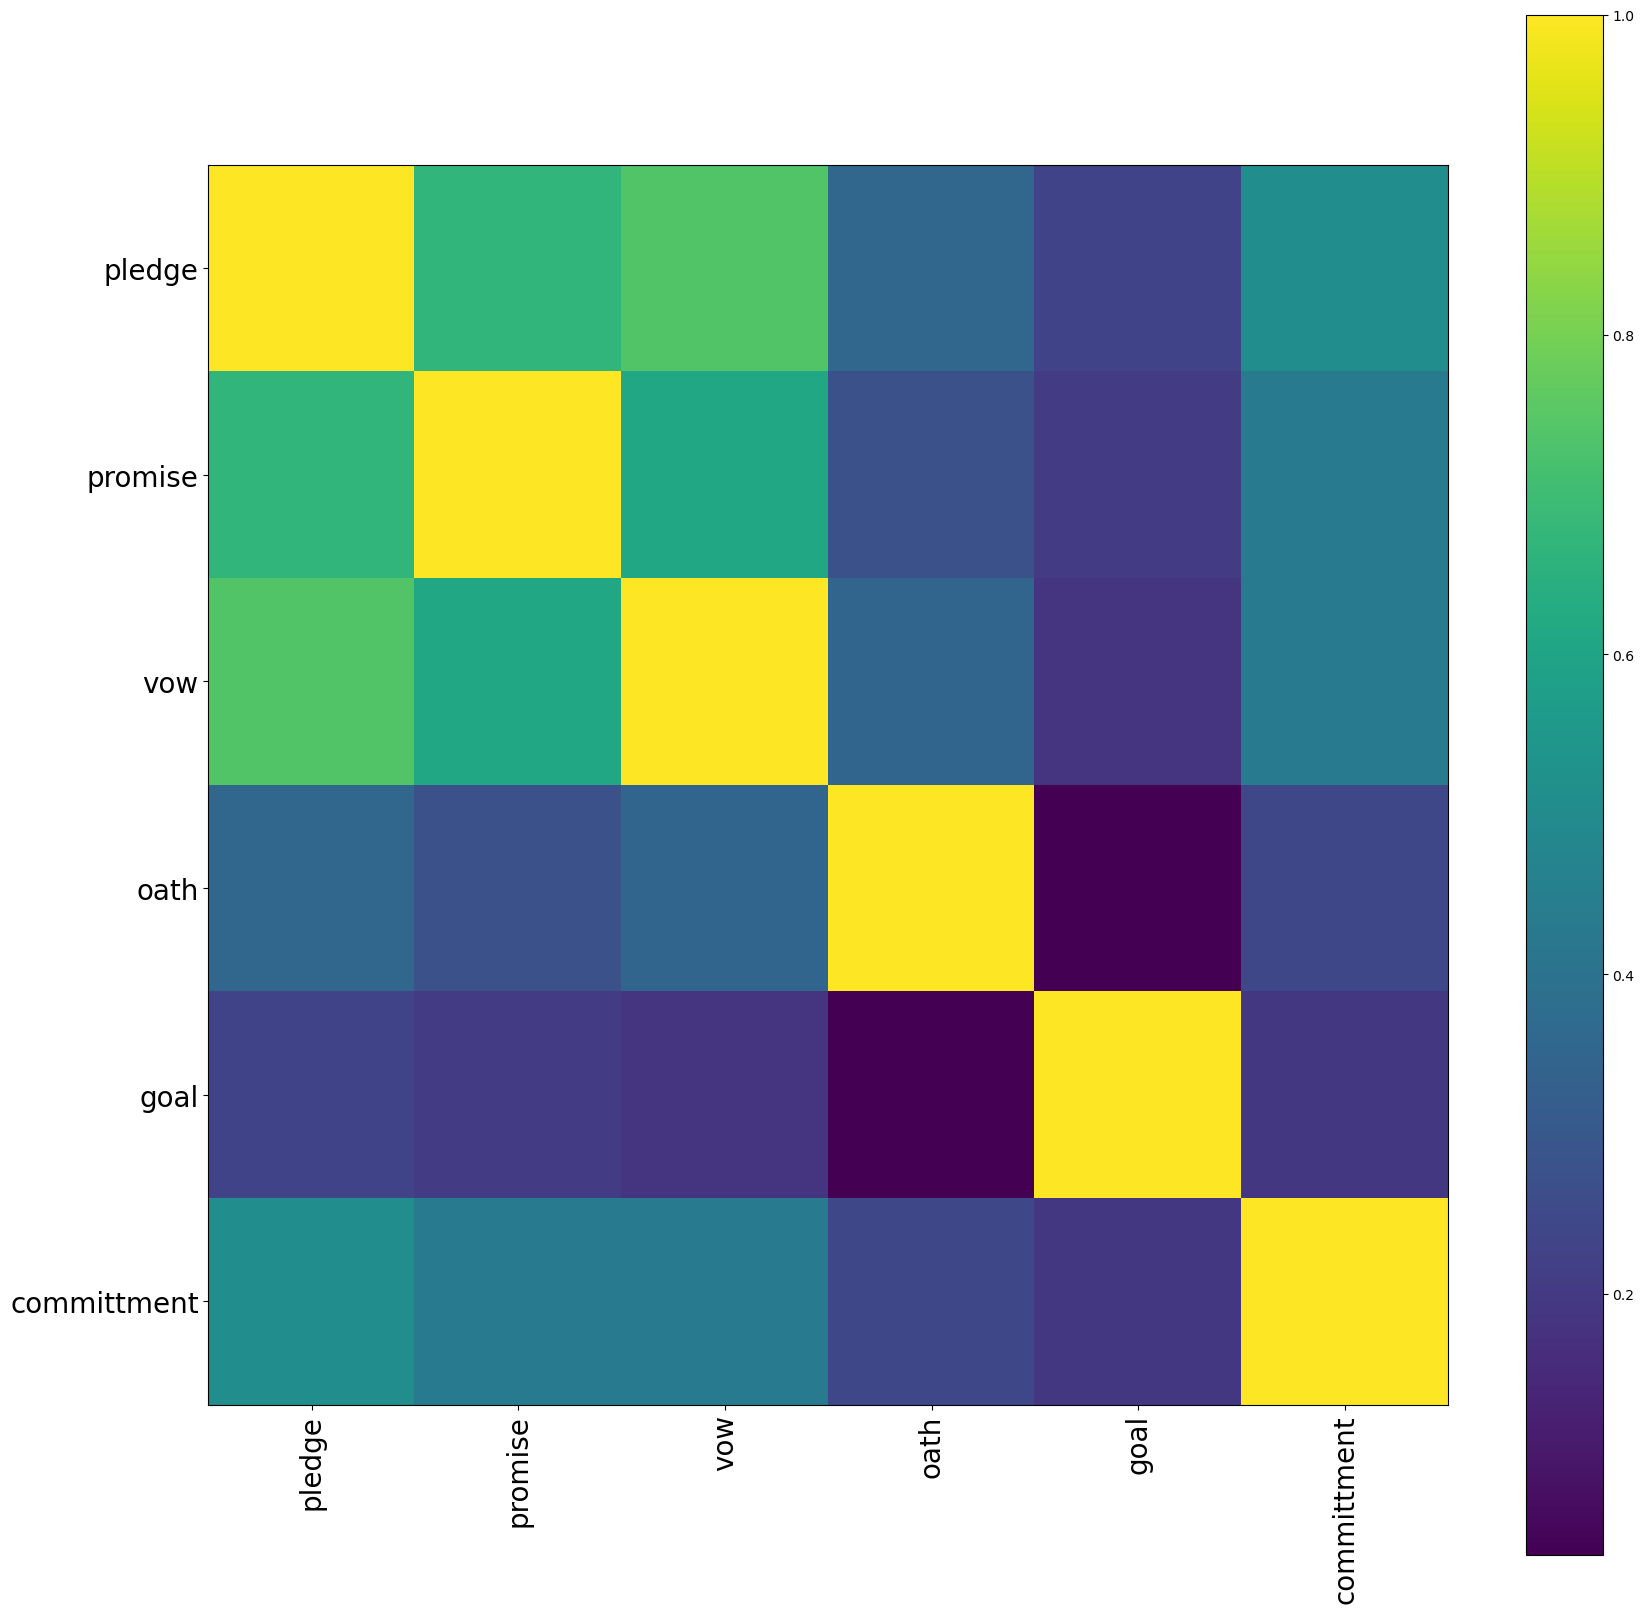

In [4]:
# Our list of pledge words

pledge_synonyms = [
                  "pledge",
                  "promise",
                  "vow",
                  "oath",
                  "goal",
                  "committment"
                  ]

#Let's see if word2vec even thinks these words are similar
synonymVecs = []
for i in range(len(pledge_synonyms)):
    synonymVecs.append(model[pledge_synonyms[i]])
    
    
synonymDistanceMap=[]
for i in range(len(synonymVecs)):
    sub=[]
    for j in range(len(synonymVecs)):
        sub.append(model.similarity(pledge_synonyms[i],pledge_synonyms[j]))
        
    synonymDistanceMap.append(sub)

    
    
figure(figsize = (20,20))
imshow(synonymDistanceMap)
colorbar()
_=xticks(arange(len(pledge_synonyms)),pledge_synonyms,rotation = 90,fontsize = 20)
_=yticks(arange(len(pledge_synonyms)),pledge_synonyms,fontsize = 20)

## It looks like even as low as a 0.1 similarity between words that could essentially mean the same thing. By using a list of words instead of just one, we can increase the span of our word2vec search.
## Since it is possible that we are completely missing words that could have similar meanings, word2vec will allow us to pick out words that are similar to ANY of the above.

In [5]:
def get_pledge_similarities(monolithicString,pledge_synonyms):

    """
    Function that takes:
    monolithicString: The web-scraped climate-page from a website as text
    pledgeSynonyms: A list of words for which we want to find similar words in the web-scraped text
    
    Returns: The maximum similarity of each word to words in the desired list, and the cleaned word list

    """


    # Clean the text
    shopifyClean=" "+monolithicString.lower() + " "
    import unicodedata
    shopifyClean = unicodedata.normalize("NFKD", shopifyClean)
    shopifyClean=shopifyClean.replace("|"," ")
    shopifyClean=shopifyClean.replace("-"," ")
    shopifyClean=shopifyClean.replace("/"," ")
    shopifyClean=shopifyClean.replace("$"," ")
    shopifyClean=shopifyClean.replace(","," ")
    shopifyClean=shopifyClean.replace("!"," ")
    shopifyClean=shopifyClean.replace("."," ")
    shopifyClean=shopifyClean.replace("("," ")
    shopifyClean=shopifyClean.replace(")"," ")
    shopifyClean=shopifyClean.replace("'"," ")
    shopifyClean=shopifyClean.replace("0"," ")
    shopifyClean=shopifyClean.replace("1"," ")
    shopifyClean=shopifyClean.replace("2"," ")
    shopifyClean=shopifyClean.replace("3"," ")
    shopifyClean=shopifyClean.replace("4"," ")
    shopifyClean=shopifyClean.replace("5"," ")
    shopifyClean=shopifyClean.replace("6"," ")
    shopifyClean=shopifyClean.replace("7"," ")
    shopifyClean=shopifyClean.replace("8"," ")
    shopifyClean=shopifyClean.replace("9"," ")
    shopifyClean=shopifyClean.replace("?"," ")
    shopifyClean=shopifyClean.replace("!"," ")
    shopifyClean=shopifyClean.replace("@"," ")
    shopifyClean=shopifyClean.replace("#"," ")
    shopifyClean=shopifyClean.replace("$"," ")
    shopifyClean=shopifyClean.replace("%"," ")
    shopifyClean=shopifyClean.replace("^"," ")
    shopifyClean=shopifyClean.replace("&"," ")
    shopifyClean=shopifyClean.replace("*"," ")
    shopifyClean=shopifyClean.replace("_"," ")
    shopifyClean=shopifyClean.replace("+"," ")
    shopifyClean=shopifyClean.replace("="," ")

    shopifyClean=shopifyClean.replace("\\"," ")
    shopifyClean=shopifyClean.replace("\\"," ")
    shopifyClean=shopifyClean.replace("\\\\"," ")
    shopifyClean=shopifyClean.replace("|"," ")
    shopifyClean=shopifyClean.replace("`"," ")
    shopifyClean=shopifyClean.replace("~"," ")
    shopifyClean=shopifyClean.replace("<"," ")
    shopifyClean=shopifyClean.replace(">"," ")
    shopifyClean=shopifyClean.replace(";"," ")
    shopifyClean=shopifyClean.replace(":"," ")
    shopifyClean=shopifyClean.replace("'"," ")
    shopifyClean=shopifyClean.replace('"'," ")
    shopifyClean=shopifyClean.replace("["," ")
    shopifyClean=shopifyClean.replace("]"," ")
    shopifyClean=shopifyClean.replace("{"," ")
    shopifyClean=shopifyClean.replace("}"," ")
    shopifyClean=shopifyClean.replace("\n"," ")
    
    shopifyClean=shopifyClean.replace(" and "," ")
    shopifyClean=shopifyClean.replace(" to "," ")
    shopifyClean=shopifyClean.replace(" the "," ")
    shopifyClean=shopifyClean.replace(" a "," ")
    #shopifyClean=shopifyClean.replace(" \u202 "," ")
    shopifyClean=shopifyClean.replace("\xa0"," ")
    shopifyClean=shopifyClean.replace("’"," ")
    

    #Having removed all of the above, were also going to remove any additional words that don't exist in the model.
    shopifyCleanSplit=shopifyClean.split()
    for i in range(len(shopifyCleanSplit)):
        if model.has_index_for(shopifyCleanSplit[i]) == False:
            shopifyClean=shopifyClean.replace(" " +shopifyCleanSplit[i]+" ", " ")


    #Loop through the words and find the similarity of each one to each of the desired words.
    shopifywords=shopifyClean.split()
    shopify_pledge_similarity=[]
    for i in range(len(shopifywords)):

        synonymsimilarities = []
        for j in range(len(pledge_synonyms)):
            try:synonymsimilarities.append(model.similarity(shopifywords[i],pledge_synonyms[j]))
            except: pass
        shopify_pledge_similarity.append(max(synonymsimilarities))


    return shopify_pledge_similarity,shopifyClean.split()

In [6]:
def get_pledgeScore(pledge_similarity):
    
    # There is no ground truth for how to define pledge score
    # It should increase the more pledge-like words are included
    # It should be normalized for number of total words.
    
    # My first thought: sum over similarity scores squared and divide by length.
    # This allows high scoring words to be overweighted compared to low scoring words, which means the normalization is less
    # Sensitive to bad webscraping
    
    # IE long rambly statements that dont say much about a pledge are penalized
    
    
    # My second thought: simply sum over pledge similarities and normalize by the length of the statement.
    # Multiply by 100 and make it a %, why not
    
    # This is far from optimized but since we are supposed to develop end to end in 1 day optimization will have to wait.
    
    
    # A funny thought: if someone's climate statement just says:
    
    #         ""   Pledge pledge pledge committment committment goal.   ""
    
    # They will recieve a perfect pledge score.
    
    return 100*sum(np.array(pledge_similarity)) / len(pledge_similarity)




# Let's test it out on Shopify!
shopify ="Better commerce for a better planet | Shopify Climate - Shopify Canada Email address Password Store name Your store name Create your store Build your dream business for $1/month Start your free trial, then enjoy 3 months of Shopify for $1/month when you sign up for a monthly Basic or Starter plan. Sign up for a free trial Select a monthly Basic or Starter plan $1/month pricing will be applied at checkout Add products, launch your store, and start selling! Shopify Solutions Start Start your business Build your brand Create your website Online store editor Customize your store Store themes Find business apps Shopify app store Own your site domain Domains & hosting Explore free business tools Tools to run your business Sell Sell your products Sell online or in person Sell online Grow your business online Sell across channels Reach millions of shoppers and boost sales Sell in person Point of Sale (POS) Sell globally International sales Sell wholesale & direct Business-to-business (B2B) Accept online payments Set up forms of payment Market Market your business Reach & retain customers Market across social Social media integrations Nurture customers Shopify Email Know your audience Gain customer insights Manage Manage your business Track sales, orders & analytics Ship orders faster Shopify shipping solution Manage your stock & orders Inventory & order management Secure business funding Shopify Capital Shopify Developers Build with Shopify's powerful APIs Plus A commerce solution for growing digital brands All Products Explore all Shopify products & features Pricing Resources Help and support Help and support Get 24/7 support How-to guides Read in-depth business guides Shopify blog Business strategy tips Popular topics What is Shopify? How our commerce platform works Shopify Editions New, innovative Shopify products Founder Stories Learn from successful merchants Branding Build your brand from scratch Marketing Build a marketing plan Ecommerce SEO Improve your search ranking Social media strategy Turn social into sales Business growth Scale your business Essential tools Business name generator Stock photography Business Plan Template Link in bio tool QR code generator Log in Start free trial Start free trial Shopify Start free trial Solutions Start Start your business Build your brand Create your website Online store editor Customize your store Store themes Find business apps Shopify app store Own your site domain Domains & hosting Explore free business tools Tools to run your business Sell Sell your products Sell online or in person Sell online Grow your business online Sell across channels Reach millions of shoppers and boost sales Sell in person Point of Sale (POS) Sell globally International sales Sell wholesale & direct Business-to-business (B2B) Accept online payments Set up forms of payment Market Market your business Reach & retain customers Market across social Social media integrations Nurture customers Shopify Email Know your audience Gain customer insights Manage Manage your business Track sales, orders & analytics Ship orders faster Shopify shipping solution Manage your stock & orders Inventory & order management Secure business funding Shopify Capital Shopify Developers Build with Shopify's powerful APIs Plus A commerce solution for growing digital brands All Products Explore all Shopify products & features Pricing Resources Help and support Help and support Get 24/7 support How-to guides Read in-depth business guides Shopify blog Business strategy tips Popular topics What is Shopify? How our commerce platform works Shopify Editions New, innovative Shopify products Founder Stories Learn from successful merchants Branding Build your brand from scratch Marketing Build a marketing plan Ecommerce SEO Improve your search ranking Social media strategy Turn social into sales Business growth Scale your business Essential tools Business name generator Stock photography Business Plan Template Link in bio tool QR code generator Log in Start free trial Opens an external site in a new window Shopify Logo Shopify About Investors Partners Affiliates Legal Service status Support Merchant support Help center Hire an Expert Shopify Community Developers Shopify.dev API documentation Dev Degree Products Shop Shop Pay Shopify Plus Linkpop Hydrogen and Oxygen Global impact Sustainability Social impact Build Black Build Native Solutions Online store builder Website builder Ecommerce website Canada (English) Canada (English) Australia Belgium Brasil Canada (Français) Colombia Danmark Deutschland España Español (Intl.) France Hong Kong SAR India Indonesia Ireland Italia Malaysia México Nederland New Zealand Nigeria Norway (English) Philippines Singapore South Africa Sverige USA United Kingdom Việt Nam 中国 中國香港特別行政區 台灣 日本 简体中文 대한민국 Canada (English) Country/region Canada (English) Australia Belgium Brasil Canada (Français) Colombia Danmark Deutschland España Español (Intl.) France Hong Kong SAR India Indonesia Ireland Italia Malaysia México Nederland New Zealand Nigeria Norway (English) Philippines Singapore South Africa Sverige USA United Kingdom Việt Nam 中国 中國香港特別行政區 台灣 日本 简体中文 대한민국 Terms of Service Privacy Policy Sitemap Facebook Twitter YouTube Instagram TikTok LinkedIn Pinterest Opens in a new window Opens an external site Opens an external site in a new window CLIMATE Better commerce for a better planet Shopify brings merchants, customers, and climate entrepreneurs together in the fight against climate change. Play video Empowering sustainable commerce Shopify builds for sustainable success from the core out, bringing businesses and their customers together in the fight against climate change. Businesses powered by Shopify can use the Planet app to remove shipping emissions through high-leverage projects and partners. And every time a customer places an order using Shop Pay , Shopify funds carbon removal to counteract the impact on the planet at no extra cost. In addition, Shopify purchases carbon removal to eliminate the shipping emissions from every single order placed during the Black Friday/Cyber Monday shopping weekend. In 2020 and 2021, we offset a combined total of more than 120,000 tonnes of carbon. Joining forces with climate entrepreneurs The Shopify Sustainability Fund contributes at least $5 million annually to support entrepreneurs at the frontier of reversing climate change. We’re backing groundbreaking technologies that are permanently removing carbon from the atmosphere. Concrete that's injected with carbon, carbon-soaked kelp that drops to the ocean floor, massive fans sponging the air of greenhouse gases – no solution is too ambitious or too crazy. Our goal is to help prove, scale, and commercialize climate technology for massive impact in the long term. Because at the end of the day, commerce can only thrive if our planet thrives too. Learn more Generating renewable power Shopify is the first Canadian-founded company to sign a power purchase agreement (PPA) to power 100% of employee home offices across North America with wind energy. The deal enables the development of a brand new wind farm in a province that has one of the most carbon-intensive energy grids in North America. 100% carbon-neutral platform Data centers have historically been a big source of greenhouse gas emissions. In 2018, we decommissioned all of our data servers and shifted entirely to Google Cloud. Google matches 100% of the energy consumed by Google Cloud with renewable energy, enabling us to run a completely carbon-neutral platform. A carbon-neutral company In 2019, Shopify began sourcing renewable power for heating, cooling, and powering our buildings and employee home offices. We’ve procured enough green energy to account for our natural gas and electricity-related carbon footprint in Canada. For travel-related emissions, which are 5x our operational footprint, we purchase verified carbon offsets. A climate commitment years in the making Here's how we got here, and where we're going. Why carbon removal Our carbon removal playbook Latest sustainability report Keep up to date with Shopify’s commitment to climate action Email address Subscribe Thanks! We’ll be in touch. Strength in numbers We're just getting started on our climate mission, and we know that no single person or organization can solve climate change alone. If you're as eager to reverse climate change as we are, we want to hear from you. Climate entrepreneurs Are you building a technology that could reverse climate change? Shopify could be your customer. Learn more Tech partners Have an innovative way for Shopify merchants to run sustainable businesses? We'd love to hear about it. Get in touch"

shopify_pledge_similarity, shopify_words = get_pledge_similarities(shopify,pledge_synonyms)




get_pledgeScore(shopify_pledge_similarity)



13.331507969569493

In [ ]:
def get_pledgeScore_fromScratch(companyStatement,pledge_synonyms):
    """Computes pledge score straight from company statement"""
    similarities, wordlist = get_pledge_similarities(companyStatement,pledge_synonyms)
    
    return get_pledgeScore(similarities)


# Get the web-scraped company files
companyFiles = glob.glob("company_data/*.txt")
# Make a list of company Names for later
companyNames = []
for i in range(len(companyFiles)):
    companyNames.append(companyFiles[i].split("\\")[1][:-4])



companyStatements = []
for i in range(len(companyFiles)):
    f = open(companyFiles[i],encoding = "utf8")
    companyStatements.append(f.read())
    f.close()
    

companyPledgeScores=[]
companyPledgeSimilarities=[]
companyWordLists=[]
for i in range(len(companyStatements)):
    
    company_pledge_similarity,company_word_list = get_pledge_similarities(companyStatements[i],pledge_synonyms)
    companyPledgeSimilarities.append(company_pledge_similarity)
    companyWordLists.append(company_word_list)

    
for i in range(len(companyPledgeSimilarities)):
    company_pledge_score = get_pledgeScore(companyPledgeSimilarities[i])
    
    companyPledgeScores.append(get_pledgeScore_fromScratch(companyStatements[i],pledge_synonyms))
    
    
# Output this as CSV for production
companyNamesandScoreDF = pd.DataFrame()
companyNamesandScoreDF["companyName"]=companyNames
companyNamesandScoreDF["pledgeScore"]=companyPledgeScores
companyNamesandScoreDF.to_csv("companyName_pledgeScore.csv")

sorted_companyNamesandScoreDF = companyNamesandScoreDF.sort_values("pledgeScore",ascending= False)

In [ ]:
figure(figsize = (20,35))
barh(sorted_companyNamesandScoreDF["companyName"],sorted_companyNamesandScoreDF["pledgeScore"])
_=xticks(fontsize = 20)
_=yticks(fontsize = 20)

xlabel("Pledge Score", fontsize = 20)
savefig("pledgeScoreByCompany")